In [1]:
import os
import ast
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import constants

In [2]:
def summarize(path, fname, name):
    model_meta = pd.read_csv(os.path.join(path, fname))
    def replace(x):
        try:
            return ast.literal_eval(x)
        except:
            return x
    for col in ['pretrain_train_losses', 'pretrain_valid_losses', 'train_losses', 'valid_losses', 'train_acc', 'valid_acc', 'grad_norm']:
        try:
            model_meta[col] = model_meta[col].apply(replace)
        except:
            pass

    model_meta['epochs'] = model_meta['train_losses'].apply(len)
    model_meta['final_train_loss'] = model_meta['train_losses'].apply(lambda x: x[-1])
    model_meta['final_grad_norm'] = model_meta['grad_norm'].apply(lambda x: x[-1])
    model_meta = model_meta.assign(approach=name)

    return model_meta

In [3]:
def read_rnn_results(root_dir, exp_dir, subject=None):
    args = exp_dir.split('_')[3:]
    df = summarize(os.path.join(root_dir, exp_dir, f's_{subject}' if subject is not None else ''), 'trial_results.csv', 'chan_avg_rnn')

    df = df.assign(hidden_size=int(args[0].split('-')[0]))
    df = df.assign(rnn_layers=int(args[1].split('-')[0]))
    df = df.assign(fc_layers=int(args[2].split('-')[0]))
    if len(args) > 3:
        df = df.assign(bidirectional=True)
    else:
        df = df.assign(bidirectional=False)
    
    return df

In [4]:
all_model_df = pd.DataFrame()

root_dir = os.path.join(constants.RESULTS_DIR,
                        'motor_LR', 'chan_avg_rnn', 'rs',
                        'bandpass_only', 'max_abs_scale', 
                        '4_montages', 'gru', 'no_early_stop', 'cropped',
                        'pretrain_montage_pool', 'all')
subject = '154'

for d in os.listdir(root_dir):
    try:
        df = read_rnn_results(root_dir, d, subject if subject is not None else None)
        all_model_df = all_model_df.append(df, ignore_index=True)
    except OSError as e:
        print(e)
    
train_cols = ['train_accuracy', 'train_precision', 'train_recall', 'train_f1']
test_cols = ['test_accuracy', 'test_precision', 'test_recall', 'test_f1']

In [5]:
all_model_df.columns

Index(['cv_iter', 'Status', 'final_test_accuracy', 'final_test_auc',
       'final_test_f1', 'final_test_loss', 'final_test_precision',
       'final_test_recall', 'final_train_accuracy', 'final_train_auc',
       'final_train_f1', 'final_train_precision', 'final_train_recall',
       'final_valid_accuracy', 'final_valid_auc', 'final_valid_f1',
       'final_valid_precision', 'final_valid_recall', 'grad_norm', 'montage',
       'pretrain_final_test_accuracy', 'pretrain_final_test_auc',
       'pretrain_final_test_f1', 'pretrain_final_test_loss',
       'pretrain_final_test_precision', 'pretrain_final_test_recall',
       'pretrain_final_train_accuracy', 'pretrain_final_train_auc',
       'pretrain_final_train_f1', 'pretrain_final_train_precision',
       'pretrain_final_train_recall', 'pretrain_final_valid_accuracy',
       'pretrain_final_valid_auc', 'pretrain_final_valid_f1',
       'pretrain_final_valid_precision', 'pretrain_final_valid_recall',
       'pretrain_grad_norm', 'pretrai

In [6]:
montage_order = constants.PAIRED_MONTAGES

## Unidirectional

In [7]:
rnn_layers = 1
fc_layers = 1
hidden_size = 32

### Early stopping (validation loss) test accuracy

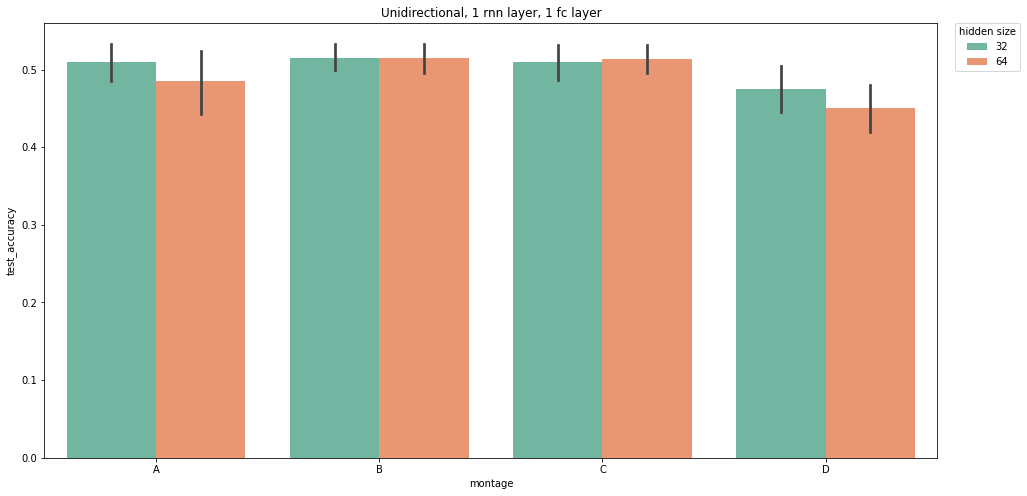

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

sns.barplot(data=all_model_df[(~all_model_df['bidirectional']) &
                              (all_model_df['rnn_layers'] == rnn_layers) &
                              (all_model_df['fc_layers'] == fc_layers)],
            x='montage', y='test_accuracy', hue='hidden_size', palette='Set2', ax=ax, order=montage_order)
plt.legend(title='hidden size', bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.title(f'Unidirectional, {rnn_layers} rnn layer, {fc_layers} fc layer');

### Final test accuracy

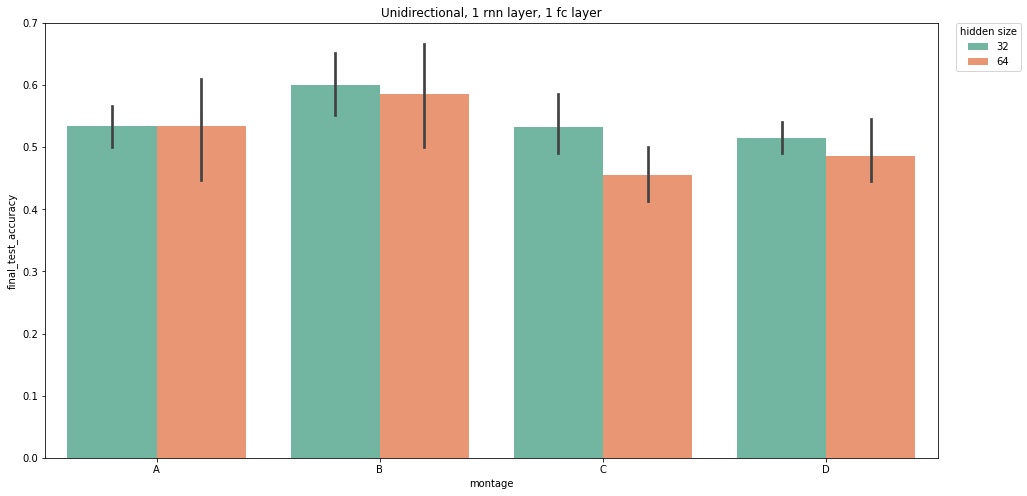

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

sns.barplot(data=all_model_df[(~all_model_df['bidirectional']) &
                              (all_model_df['rnn_layers'] == rnn_layers) &
                              (all_model_df['fc_layers'] == fc_layers)],
            x='montage', y='final_test_accuracy', hue='hidden_size', palette='Set2', ax=ax, order=montage_order)
plt.legend(title='hidden size', bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.title(f'Unidirectional, {rnn_layers} rnn layer, {fc_layers} fc layer');

### Early stopping (validation loss) train accuracy

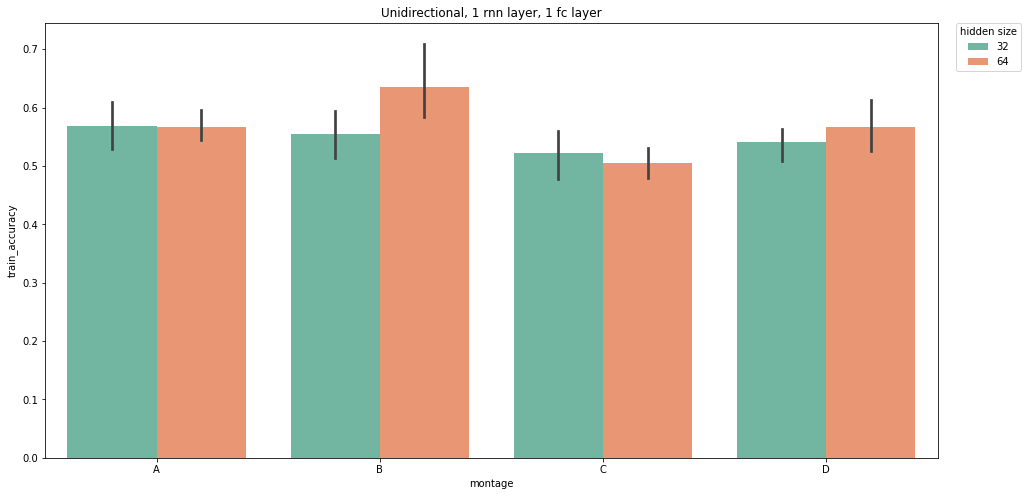

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

sns.barplot(data=all_model_df[(~all_model_df['bidirectional']) &
                              (all_model_df['rnn_layers'] == rnn_layers) &
                              (all_model_df['fc_layers'] == fc_layers)],
            x='montage', y='train_accuracy', hue='hidden_size', palette='Set2', ax=ax, order=montage_order)
plt.legend(title='hidden size', bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.title(f'Unidirectional, {rnn_layers} rnn layer, {fc_layers} fc layer');

### Final train accuracy

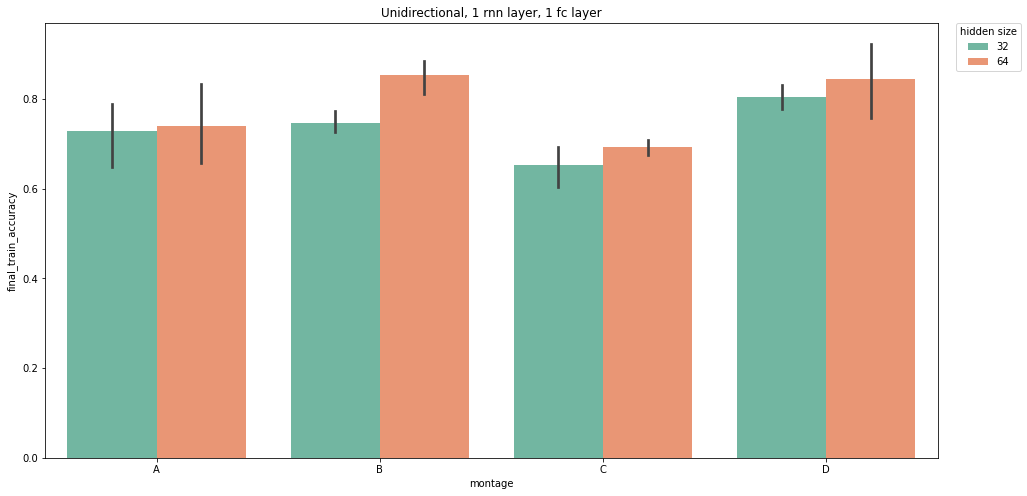

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

sns.barplot(data=all_model_df[(~all_model_df['bidirectional']) &
                              (all_model_df['rnn_layers'] == rnn_layers) &
                              (all_model_df['fc_layers'] == fc_layers)],
            x='montage', y='final_train_accuracy', hue='hidden_size', palette='Set2', ax=ax, order=montage_order)
plt.legend(title='hidden size', bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.title(f'Unidirectional, {rnn_layers} rnn layer, {fc_layers} fc layer');

## Training and test metrics

In [12]:
output_df = all_model_df[(~all_model_df['bidirectional']) &
                         (all_model_df['fc_layers'] == fc_layers) &
                         (all_model_df['rnn_layers'] == rnn_layers) & 
                         (all_model_df['hidden_size'] == hidden_size)].groupby('montage').median()
output_df[test_cols + train_cols + ['epochs']].round(3)

,test_accuracy,test_precision,test_recall,test_f1,train_accuracy,train_precision,train_recall,train_f1,epochs
montage,,,,,,,,,
A,0.524,0.450,0.100,0.154,0.568,0.671,0.234,0.345,299
B,0.500,0.500,0.667,0.571,0.570,0.558,0.768,0.646,299
C,0.523,0.528,0.826,0.644,0.546,0.544,0.750,0.640,299
D,0.475,0.484,0.750,0.588,0.560,0.566,0.578,0.574,299


In [21]:
output_df = all_model_df[(~all_model_df['bidirectional']) &
                         (all_model_df['fc_layers'] == fc_layers) &
                         (all_model_df['rnn_layers'] == rnn_layers) & 
                         (all_model_df['hidden_size'] == hidden_size)].groupby('montage').max()
output_df[test_cols + train_cols + ['epochs']].round(3)

,test_accuracy,test_precision,test_recall,test_f1,train_accuracy,train_precision,train_recall,train_f1,epochs
montage,,,,,,,,,
A,0.548,0.556,0.65,0.542,0.722,0.737,0.734,0.694,300
B,0.619,0.609,0.81,0.654,0.627,0.680,0.783,0.667,300
C,0.545,0.535,1.00,0.697,0.607,0.620,0.764,0.626,300
D,0.500,0.476,0.50,0.488,0.672,0.848,0.438,0.577,300


In [22]:
summary_df = output_df[['hidden_size', 'rnn_layers', 'fc_layers',] + test_cols].round(3)
summary_df.reset_index(inplace=True)
summary_df.set_index = montage_order
print(summary_df.to_latex(index=False,
                          header=['Montage', 'Hidden Size', 'RNN Layers', 'FC Layers', 'Accuracy', 'Precision', 'Recall', 'F1']))

\begin{tabular}{lrrrrrrr}
\toprule
Montage & Hidden Size & RNN Layers & FC Layers & Accuracy & Precision & Recall &     F1 \\
\midrule
      A &          32 &          1 &         1 &    0.548 &     0.556 &   0.65 &  0.542 \\
      B &          32 &          1 &         1 &    0.619 &     0.609 &   0.81 &  0.654 \\
      C &          32 &          1 &         1 &    0.545 &     0.535 &   1.00 &  0.697 \\
      D &          32 &          1 &         1 &    0.500 &     0.476 &   0.50 &  0.488 \\
\bottomrule
\end{tabular}



In [23]:
train_df = output_df[train_cols].round(3)
train_df.reset_index(inplace=True)
train_df.set_index = montage_order
print(train_df.to_latex(index=False,
                        header=['Montage', 'Train Accuracy', 'Train Precision', 'Train Recall', 'Train F1']))

\begin{tabular}{lrrrr}
\toprule
Montage & Train Accuracy & Train Precision & Train Recall & Train F1 \\
\midrule
      A &          0.722 &           0.737 &        0.734 &    0.694 \\
      B &          0.627 &           0.680 &        0.783 &    0.667 \\
      C &          0.607 &           0.620 &        0.764 &    0.626 \\
      D &          0.672 &           0.848 &        0.438 &    0.577 \\
\bottomrule
\end{tabular}



In [24]:
test_df = output_df[test_cols].round(3)
test_df.reset_index(inplace=True)
test_df.set_index = montage_order
print(test_df.to_latex(index=False,
                       header=['Montage', 'Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1']))

\begin{tabular}{lrrrr}
\toprule
Montage & Test Accuracy & Test Precision & Test Recall & Test F1 \\
\midrule
      A &         0.548 &          0.556 &        0.65 &   0.542 \\
      B &         0.619 &          0.609 &        0.81 &   0.654 \\
      C &         0.545 &          0.535 &        1.00 &   0.697 \\
      D &         0.500 &          0.476 &        0.50 &   0.488 \\
\bottomrule
\end{tabular}



## Train/Valid Losses

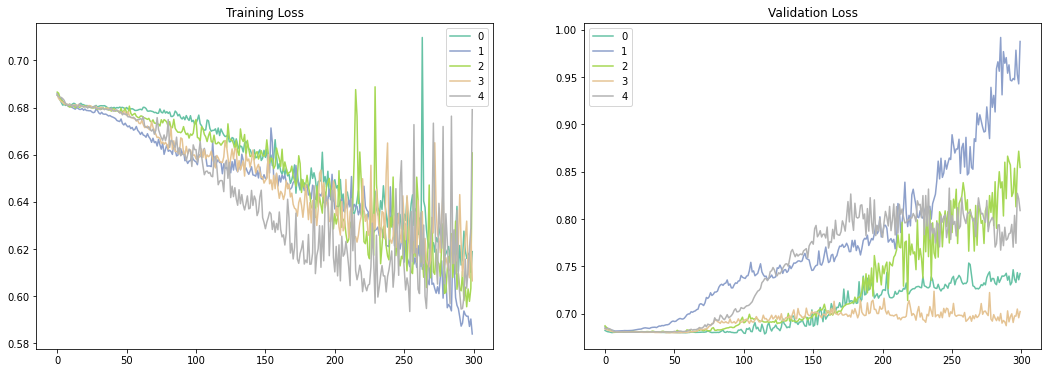

In [25]:
rnn_layers = 1
fc_layers = 1
hidden_size = 32
bidirectional = False
montage = 'C'

subset_df = all_model_df[(all_model_df['hidden_size'] == hidden_size) &
                         (all_model_df['rnn_layers'] == rnn_layers) & 
                         (all_model_df['fc_layers'] == fc_layers) & 
                         (all_model_df['bidirectional'] == bidirectional) & 
                         (all_model_df['montage'] == montage)]

n = len(subset_df)
colors = plt.cm.Set2(np.linspace(0, 1, n))

fig, ax = plt.subplots(1, 2, figsize=(18, 6))
for i, idx in enumerate(subset_df.index):
    ax[0].plot(subset_df.loc[idx, 'train_losses'], color=colors[i])
    ax[1].plot(subset_df.loc[idx, 'valid_losses'], color=colors[i])
    ax[0].set_title('Training Loss')
    ax[1].set_title('Validation Loss')
    if subject is not None:
        ax[0].legend(subset_df.cv_iter.unique())
        ax[1].legend(subset_df.cv_iter.unique())
    else:
        ax[0].legend(subset_df.subject.unique())
        ax[1].legend(subset_df.subject.unique())

## Train/Valid Accuracy

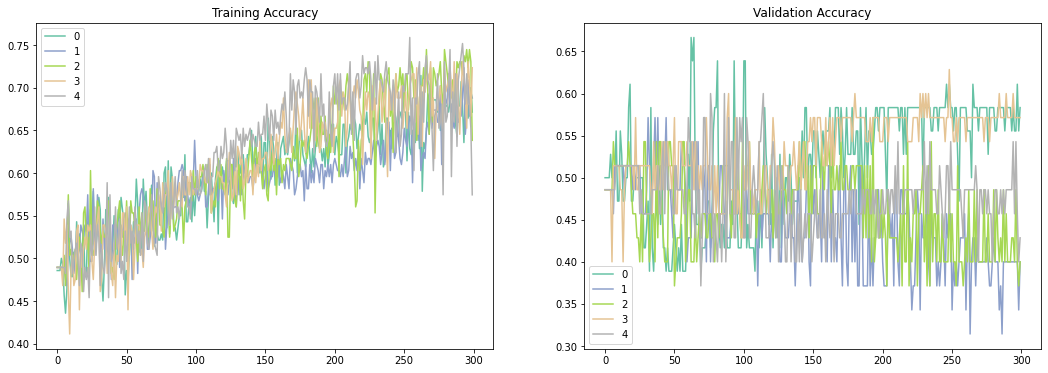

In [26]:
subset_df = all_model_df[(all_model_df['hidden_size'] == hidden_size) &
                         (all_model_df['rnn_layers'] == rnn_layers) & 
                         (all_model_df['fc_layers'] == fc_layers) & 
                         (all_model_df['bidirectional'] == bidirectional) & 
                         (all_model_df['montage'] == montage)]

n = len(subset_df)
colors = plt.cm.Set2(np.linspace(0, 1, n))

fig, ax = plt.subplots(1, 2, figsize=(18, 6))
for i, idx in enumerate(subset_df.index):
    ax[0].plot(subset_df.loc[idx, 'train_acc'], color=colors[i])
    ax[1].plot(subset_df.loc[idx, 'valid_acc'], color=colors[i])
    ax[0].set_title('Training Accuracy')
    ax[1].set_title('Validation Accuracy')
    if subject is not None:
        ax[0].legend(subset_df.cv_iter.unique())
        ax[1].legend(subset_df.cv_iter.unique())
    else:
        ax[0].legend(subset_df.subject.unique())
        ax[1].legend(subset_df.subject.unique())

## Gradient Norm

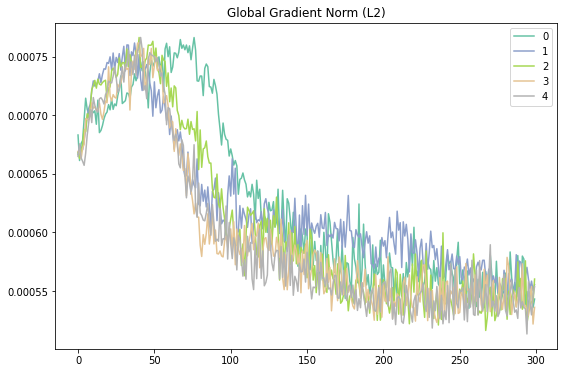

In [27]:
subset_df = all_model_df[(all_model_df['hidden_size'] == hidden_size) &
                         (all_model_df['rnn_layers'] == rnn_layers) & 
                         (all_model_df['fc_layers'] == fc_layers) & 
                         (all_model_df['bidirectional'] == bidirectional) & 
                         (all_model_df['montage'] == montage)]

n = len(subset_df)
colors = plt.cm.Set2(np.linspace(0, 1, n))

fig, ax = plt.subplots(1, 1, figsize=(9, 6))
for i, idx in enumerate(subset_df.index):
    ax.plot(subset_df.loc[idx, 'grad_norm'], color=colors[i])
    ax.set_title('Global Gradient Norm (L2)')
    if subject is not None:
        ax.legend(subset_df.cv_iter.unique())

## View predictions

In [88]:
rnn_layers = 1
fc_layers = 1
hidden_size = 32
bidirectional = False
montage = 'C'
phase = 'test'
final = False
cv_iter = 0

suffix = '_bidirectional' if bidirectional else ''

exp_dir = f'pool_chan_rnn_{hidden_size}-hidden_{rnn_layers}-rnn_{fc_layers}-fc{suffix}'

def aggregate_predictions(root_dir, exp_dir, subject, montage, phase):
    
    out_df = pd.DataFrame()
    for i in range(5):
        df = pd.read_parquet(
            os.path.join(root_dir, exp_dir,
                         f's_{subject}' if subject is not None else '',
                         'final_predictions' if final else 'predictions',
                         f'{subject}_{montage}_{phase}_{i}.parquet'))
        out_df = out_df.append(df, ignore_index=True)
        
    return out_df

pred_df = aggregate_predictions(root_dir, exp_dir, subject, montage, phase)
pred_df['pred'] = pred_df['pred'].astype(np.float32)
subset_df = pred_df[pred_df['cv_iter'] == cv_iter]
subset_df

,subject_id,montage,cv_iter,true,pred,prob
0,127,C,0,0.0,0.0,0.477025
1,127,C,0,1.0,0.0,0.478914
2,127,C,0,1.0,0.0,0.476300
3,127,C,0,1.0,0.0,0.479003
4,127,C,0,0.0,0.0,0.478065
5,127,C,0,1.0,0.0,0.477593
6,127,C,0,0.0,0.0,0.478536
7,127,C,0,1.0,0.0,0.477085
8,127,C,0,1.0,0.0,0.478442
9,127,C,0,1.0,0.0,0.478659


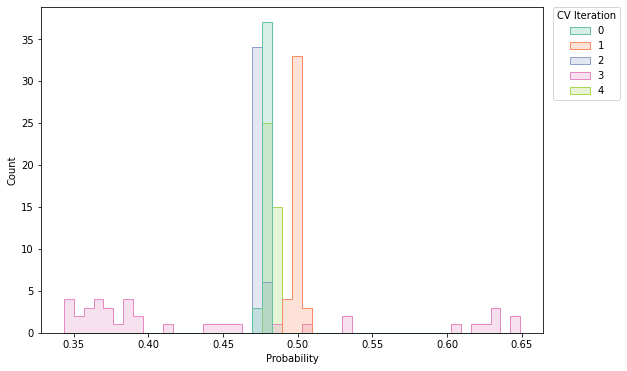

In [89]:
def move_legend(ax, new_title, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    if new_title is not None:
        title = new_title
    else:
        title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

fig, ax = plt.subplots(1, 1, figsize=(9, 6))

sns.histplot(data=pred_df, x='prob', hue='cv_iter', element='step', fill=True, palette='Set2', ax=ax)
move_legend(ax, new_title='CV Iteration', bbox_to_anchor=(1.02, 1), new_loc=2, borderaxespad=0.)
ax.set_xlabel('Probability');

In [93]:
from sklearn.metrics import accuracy_score

accuracy_score(subset_df['true'], subset_df['pred'])

0.5

In [94]:
np.bincount(subset_df.true.values.astype(int))

array([20, 20])

In [95]:
subset_df.pred.unique()

array([0.], dtype=float32)

# Save cross-subject results

In [74]:
all_subject_df = pd.DataFrame()

root_dir = os.path.join(constants.RESULTS_DIR,
                        'motor_LR', 'chan_avg_rnn', 'rs',
                        'bandpass_only', 'max_abs_scale', 
                        '4_montages', 'gru', 'no_early_stop', 'cropped',
                        'baseline_pool', 'all')
subjects = constants.SUBSET_SUBJECT_IDS

for d in os.listdir(root_dir):
    for subject in subjects:
        try:
            df = read_rnn_results(root_dir, d, subject if subject is not None else None)
            df.loc[:, 'subject_id'] = subject
            all_subject_df = all_subject_df.append(df, ignore_index=True)
        except OSError as e:
            pass

all_subject_df.loc[:, 'approach'] = 'Channel-pool RNN'

In [75]:
all_subject_df.subject_id.unique()

array(['154', '534', '152', '527', '505', '127'], dtype=object)

In [76]:
rnn_layers = 1
fc_layers = 1
hidden_size = 32

all_subject_df = all_subject_df[(all_subject_df['rnn_layers'] == rnn_layers) &
                                (all_subject_df['fc_layers'] == fc_layers) &
                                (all_subject_df['hidden_size'] == hidden_size)]

In [77]:
all_subject_df.to_parquet(
    os.path.join(constants.RESULTS_DIR, 'motor_LR', 'approach_tables', 'chan_pool_rnn.parquet'))

In [78]:
df = pd.read_parquet(os.path.join(constants.RESULTS_DIR, 'motor_LR', 'approach_tables', 'chan_pool_rnn.parquet'))
df.columns

Index(['cv_iter', 'Status', 'final_test_accuracy', 'final_test_auc',
       'final_test_f1', 'final_test_loss', 'final_test_precision',
       'final_test_recall', 'final_train_accuracy', 'final_train_auc',
       'final_train_f1', 'final_train_precision', 'final_train_recall',
       'final_valid_accuracy', 'final_valid_auc', 'final_valid_f1',
       'final_valid_precision', 'final_valid_recall', 'grad_norm', 'montage',
       'subject', 'test_accuracy', 'test_auc', 'test_f1', 'test_precision',
       'test_recall', 'train_acc', 'train_accuracy', 'train_auc', 'train_f1',
       'train_losses', 'train_precision', 'train_recall', 'valid_acc',
       'valid_accuracy', 'valid_auc', 'valid_f1', 'valid_losses',
       'valid_precision', 'valid_recall', 'epochs', 'final_train_loss',
       'final_grad_norm', 'approach', 'hidden_size', 'rnn_layers', 'fc_layers',
       'bidirectional', 'subject_id'],
      dtype='object')

In [79]:
df.subject_id.describe()

count     120
unique      6
top       527
freq       20
Name: subject_id, dtype: object